In [1]:
from pyopenms import *

In [25]:
exp = MSExperiment()
MzMLFile().load("28.mzML", exp)
# Get first spectrum
spectra = exp.getSpectra()
observed_spectrum = spectra[0]
mz,inti,Rt=[],[],[]
for i in range(0,11):
    mz.append(spectra[i].get_peaks()[0])
    inti.append(spectra[i].get_peaks()[0])
    Rt.append(spectra[i].get_peaks()[0])
    

In [26]:
dig = ProteaseDigestion()
dig.getEnzymeName()
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
print(result[4].toString())
len(result)

CQDPNPCLSTPCK


156

In [27]:
dig.digest(NOTC1, result, 4,40)
# print the results
for s in result:
    print(s.toString())

MPPLLAPLLCLALLPALAAR
CSQPGETCLNGGK
CEAANGTEACVCGGAFVGPR
CQDPNPCLSTPCK
NAGTCHVVDR
GVADYACSCALGFSGPLCLTPLDNACLTNPCR
NGGTCDLLTLTEYK
CPPGWSGK
SCQQADPCASNPCANGGQCLPFEASYICHCPPSFHGPTCR
QDVNECGQKPGLCR
HGGTCHNEVGSYR
CVCR
NGGACVDGVNTYNCR
VASFYCECPHGR
TGLLCHLNDACISNPCNEGSNCDTNPVNGK
AICTCPSGYTGPACSQDVDECSLGANPCEHAGK
CINTLGSFECQCLQGYTGPR
CLDK
INEFQCECPTGFTGHLCQYDVDECASTPCK
NGAK
CLDGPNTYTCVCTEGYTGTHCEVDIDECDPDPCHYGSCK
DGVATFTCLCRPGYTGHHCETNINECSSQPCR
HGGTCQDR
DNAYLCFCLK
GTTGPNCEINLDDCASSPCDSGTCLDK
CPEGYHDPTCLSEVNECNSNPCVHGACR
DSLNGYK
CDCDPGWSGTNCDINNNECESNPCVNGGTCK
DMTSGYVCTCR
EGFSGPNCQTNINECASNPCLNQGTCIDDVAGYK
CNCLLPYTGATCEVVLAPCAPSPCR
NGGECR
QSEDYESFSCVCPTGWQGQTCEVDINECVLSPCR
HGASCQNTHGGYR
CHCQAGYSGR
NCETDIDDCRPNPCHNGGSCTDGINTAFCDCLPGFR
GTFCEEDINECASDPCR
CTCPQGYTGPNCQNLVHWCDSSPCK
NGGK
CWQTHTQYR
CECPSGWTGLYCDVPSVSCEVAAQR
QGVDVAR
LCQHGGLCVDAGNTHHCR
CQAGYTGSYCEDLVDECSPSPCQNGATCTDYLGGYSCK
CVAGYHGVNCSEEIDECLSHPCQNGGTCLDLPNTYK
CSCPR
GTQGVHCEINVDDCNPPVDPVSR
CFNNGTCVDQVGGYSCTCPPGFVGER
CEGDVNECLSNPCDAR
GT

In [28]:
from collections import Counter
peptides = [AASequence.fromString(s.toString()) for s in result]
mass_of_peptides={}
for peptide in peptides:
    mass_of_peptides[peptide.toString()]=peptide.getMonoWeight()

In [29]:
import pandas as pd 
df = pd.DataFrame(list(mass_of_peptides.items()), columns = ['peptide', 'Mass'])
df

,peptide,Mass
0,MPPLLAPLLCLALLPALAAR,2056.230489
1,CSQPGETCLNGGK,1292.548928
2,CEAANGTEACVCGGAFVGPR,1910.807347
3,CQDPNPCLSTPCK,1404.583599
4,NAGTCHVVDR,1070.492732
...,...,...
105,GLACGSK,634.310849
106,SQDGK,533.244544
107,LAFETGPPR,986.518535
108,LQSGMVPNQYNPLR,1615.814068


In [30]:
Counter(mass_of_peptides.values())

Counter({2056.2304888511003: 1,
         1292.5489281395999: 1,
         1910.8073470818001: 1,
         1404.5835991248: 1,
         1070.492731963: 1,
         3244.4483835723: 1,
         1526.7286681114: 1,
         830.3745124525999: 1,
         4195.6984413402: 1,
         1545.7028037457: 1,
         1415.6000524415: 1,
         479.1984605127: 1,
         1541.6351184905: 1,
         1367.5750821714998: 1,
         3102.3263552681: 1,
         3283.3348722214005: 1,
         2188.9703907836: 1,
         477.2257218465: 1,
         3337.3494592852003: 1,
         388.20703489320005: 1,
         4242.602598244501: 1,
         3498.4632006360994: 1,
         872.3559033888: 1,
         1188.530757012: 1,
         2715.0768483430006: 1,
         3033.1932315196004: 1,
         795.3762876906999: 1,
         3248.1668214091: 1,
         1234.4780706782: 1,
         3561.4905230656013: 1,
         2580.1667252963002: 1,
         634.2493119421999: 1,
         3811.5568892421998: 1,
 

In [31]:
names = []
ProteaseDB().getAllNames(names)
len(names) 

33

In [32]:
from pyopenms import *

tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
peptide = AASequence.fromString("GLACGSK")
# standard behavior is adding b- and y-ions of charge 1
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of GLACGSK has 6 peaks.
y1+ is generated at m/z 147.112804913371
y2+ is generated at m/z 234.14483407287105
y3+ is generated at m/z 291.166298168571
y4+ is generated at m/z 394.175483058071
y5+ is generated at m/z 465.212597217571
y6+ is generated at m/z 578.2966615684709


Text(0, 0.5, 'intensity')

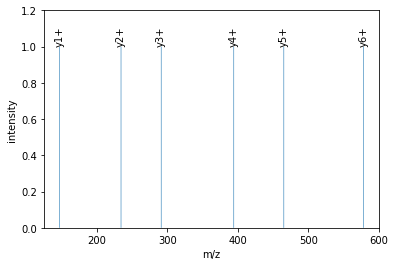

In [33]:
import matplotlib.pyplot as plt
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

In [34]:
dig = ProteaseDigestion()
dig.getEnzymeName()
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
peptides = [AASequence.fromString(s.toString()) for s in result]

# Iterate over annotated ions and their masses
for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()

    # standard behavior is adding b- and y-ions of charge 1
    p = Param()
    p.setValue("add_b_ions", "false")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ(),peak.getIntensity())

Spectrum 1 of MPPLLAPLLCLALLPALAAR has 19 peaks.
y1+ is generated at m/z 175.118952913371 1.0
y2+ is generated at m/z 246.156067072871 1.0
y3+ is generated at m/z 317.19318123237105 1.0
y4+ is generated at m/z 430.27724558327105 1.0
y5+ is generated at m/z 501.31435974277105 1.0
y6+ is generated at m/z 598.367123966071 1.0
y7+ is generated at m/z 711.451188316971 1.0
y8+ is generated at m/z 824.535252667871 1.0
y9+ is generated at m/z 895.572366827371 1.0
y10+ is generated at m/z 1008.656431178271 1.0
y11+ is generated at m/z 1111.665616067771 1.0
y12+ is generated at m/z 1224.749680418671 1.0
y13+ is generated at m/z 1337.833744769571 1.0
y14+ is generated at m/z 1434.886508992871 1.0
y15+ is generated at m/z 1505.9236231523712 1.0
y16+ is generated at m/z 1619.0076875032712 1.0
y17+ is generated at m/z 1732.0917518541712 1.0
y18+ is generated at m/z 1829.1445160774713 1.0
y19+ is generated at m/z 1926.1972803007714 1.0
Spectrum 1 of GPR has 2 peaks.
y1+ is generated at m/z 175.118952

Spectrum 1 of MHDGTTPLILAAR has 12 peaks.
y1+ is generated at m/z 175.118952913371 1.0
y2+ is generated at m/z 246.156067072871 1.0
y3+ is generated at m/z 317.19318123237105 1.0
y4+ is generated at m/z 430.27724558327105 1.0
y5+ is generated at m/z 543.361309934171 1.0
y6+ is generated at m/z 656.445374285071 1.0
y7+ is generated at m/z 753.498138508371 1.0
y8+ is generated at m/z 854.5458177316709 1.0
y9+ is generated at m/z 955.593496954971 1.0
y10+ is generated at m/z 1012.614961050671 1.0
y11+ is generated at m/z 1127.641905210171 1.0
y12+ is generated at m/z 1264.700817433471 1.0
Spectrum 1 of LAVEGMLEDLINSHADVNAVDDLGK has 24 peaks.
y1+ is generated at m/z 147.112804913371 1.0
y2+ is generated at m/z 204.13426900907103 1.0
y3+ is generated at m/z 317.21833335997104 1.0
y4+ is generated at m/z 432.245277519471 1.0
y5+ is generated at m/z 547.2722216789709 1.0
y6+ is generated at m/z 646.340635966071 1.0
y7+ is generated at m/z 717.377750125571 1.0
y8+ is generated at m/z 831.42067

In [35]:
for i in range(len(observed_spectrum.get_peaks()[1])):
    if observed_spectrum.get_peaks()[1][i]>0.0:
        print(observed_spectrum.get_peaks()[1][i],observed_spectrum.get_peaks()[0][i])



2490.316 350.81231689453125
1957.7623 351.1719055175781
4279.518 351.2080993652344
4253.083 351.2449645996094
3521.569 351.3632507324219
1900.1039 352.2383117675781
2695.7703 353.34259033203125
7494.9453 353.3787841796875
2585.2122 353.85931396484375
2271.7688 354.1317138671875
1990.6212 354.8080749511719
2134.4097 354.87213134765625
4590.2026 355.0572509765625
881358.75 355.07073974609375
2383.0889 355.0963439941406
1723.2941 355.172119140625
7853.4136 355.1859436035156
1801.1046 355.2827453613281
2877.6702 355.3220520019531
237101.77 356.07086181640625
24137.58 357.0501708984375
155117.03 357.0672607421875
1908.3479 357.20135498046875
26096.312 357.2388610839844
3063.8381 357.3011169433594
3506.971 358.0494079589844
25564.951 358.0665588378906
2017.6586 358.17236328125
2221.3176 358.23114013671875
3518.0989 358.24298095703125
86480.49 359.02923583984375
3527.0222 359.04803466796875
9044.9 359.06475830078125
20028.36 360.0303955078125
1611.9812 360.1522521972656
10350.467 360.20913696

In [36]:
protein_ids = []
peptide_ids = []
hits = []
MZs = []
INts = []
RTs=[]
c = 0
SimpleSearchEngineAlgorithm().search("28.mzML", "NOTC1.fasta", protein_ids, peptide_ids)
for peptide_id in peptide_ids:
  # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())   
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    
    
    INts.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[1])
    MZs.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[0])
    RTs.append((spectra[peptide_id.getMetaValue("scan_index")].getRT())*MZs[c])
    c+=1
    
    print("Peptide scan name:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  # PeptideHits
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit charge:", hit.getCharge())
        print(" - Peptide hit sequence:", hit.getSequence())
        hits.append(hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        print(" - Peptide ppm error:", abs(mz - peptide_id.getMZ())/mz *10**6 )
        print(" - Peptide hit score:", hit.getScore())

Peptide ID m/z: 426.864670318305
Peptide ID rt: 231.271062
Peptide scan index: 168
Peptide scan name: 168
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 3
 - Peptide hit sequence: NGGTC(Carbamidomethyl)AVASNTAR
 - Peptide hit monoisotopic m/z: 426.8666945926711
 - Peptide ppm error: 4.742169843000738
 - Peptide hit score: 0.3767429292201996
Peptide ID m/z: 371.209499285237
Peptide ID rt: 233.00619
Peptide scan index: 203
Peptide scan name: 203
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 4
 - Peptide hit sequence: EPLGEDSVGLKPLK
 - Peptide hit monoisotopic m/z: 371.21070585997103
 - Peptide ppm error: 3.2503769826909785
 - Peptide hit score: 0.0069092679768800735
Peptide ID m/z: 378.880160114934
Peptide ID rt: 233.417064
Peptide scan index: 210
Peptide scan name: 210
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 3
 - Peptide hit sequence: LLDEYNLVR
 - Peptide hit monoisotopic m/z: 378.

In [37]:
for i in range(len(hits)):
    print(hits[i])

NGGTC(Carbamidomethyl)AVASNTAR
EPLGEDSVGLKPLK
LLDEYNLVR
VLLDHFANR
M(Oxidation)HDGTTPLILAAR
ASLLPGGSEGGR
ASLLPGGSEGGR
HGGTC(Carbamidomethyl)QDR
NSSFHFLR
EETPLFLAAR
ELDPMDVR
GTQNC(Carbamidomethyl)VQR
MHDGTTPLILAAR
ASLLPGGSEGGR
MHDGTTPLILAAR
LQSGM(Oxidation)VPNQYNPLR
GTQNC(Carbamidomethyl)VQR
TGETALHLAAR
M(Oxidation)HHDIVR
EETPLFLAAR
VLLDHFANR
TGETALHLAAR
LLDEYNLVR
EETPLFLAAR
MHHDIVR
MHDGTTPLILAAR
NSSFHFLR
VLLDHFANR
GTQNC(Carbamidomethyl)VQR
C(Carbamidomethyl)HC(Carbamidomethyl)QAGYSGR
GSIVYLEIDNR
GSIVYLEIDNR
LLDEYNLVR
DAHGQQM(Oxidation)IFPYYGR
MHDGTTPLILAAR
LQSGM(Oxidation)VPNQYNPLR
LQSGM(Oxidation)VPNQYNPLR
VLHTNVVFK
LAFETGPPR
TGETALHLAAR
TGETALHLAAR
NAGTC(Carbamidomethyl)HVVDR
M(Oxidation)HHDIVR
TGETALHLAAR
QWTQQHLDAADLR
LLEASADANIQDNMGR
ASLLPGGSEGGR
ASLLPGGSEGGR
LQSGMVPNQYNPLR
LQSGMVPNQYNPLR
QGVDVAR
TGETALHLAAR
NC(Carbamidomethyl)TQSLQC(Carbamidomethyl)WK
LAFETGPPR
LLDEYNLVR
EETPLFLAAR
FEEPVVLPDLDDQTDHR
NSSFHFLR
ASLLPGGSEGGR
M(Oxidation)HHDIVR
QGVDVAR
GTQNC(Carbamidomethyl)VQR
C(Carba

In [38]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
peptide = AASequence.fromString(str(hits[0]))
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)

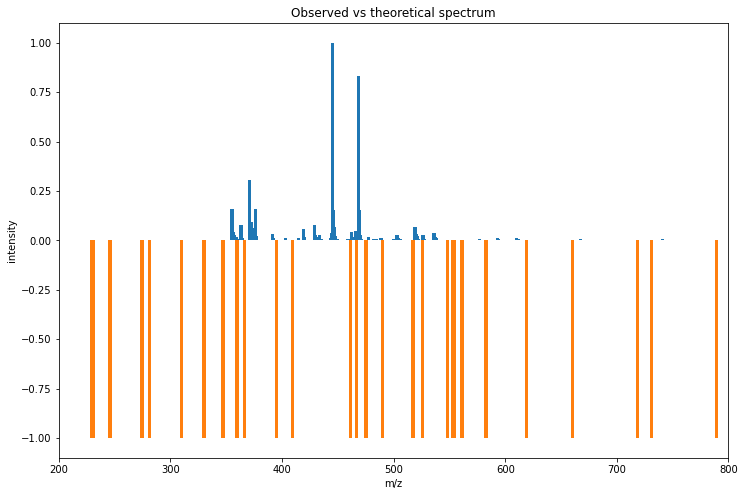

In [39]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / (max(obs_int)) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
    plt.xlim([200.0,800.0])
# observed = expermintal = mzML
obs_mz, obs_int = observed_spectrum.get_peaks()

#if obs_int.any() == 0:
 #   obs_int = 1

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
# theo = Theoritical = FASTA
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

Text(0.5, 0, 'Intensity')

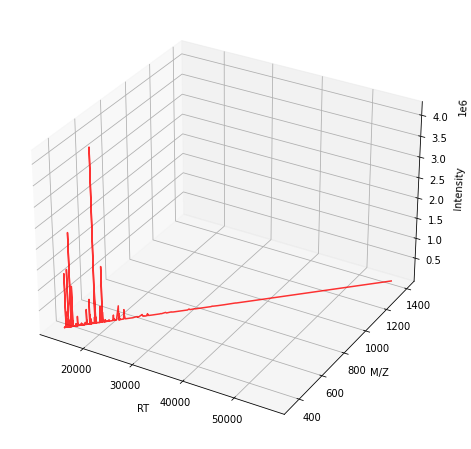

In [40]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
rt = observed_spectrum.getRT()  
RT = [rt]*len(obs_mz)
  
ax.plot(RTs[0],MZs[0], INts[0], zdir='z', color='red',alpha=0.8) 

ax.set_xlabel('RT')
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

Text(0.5, 0, 'Intensity')

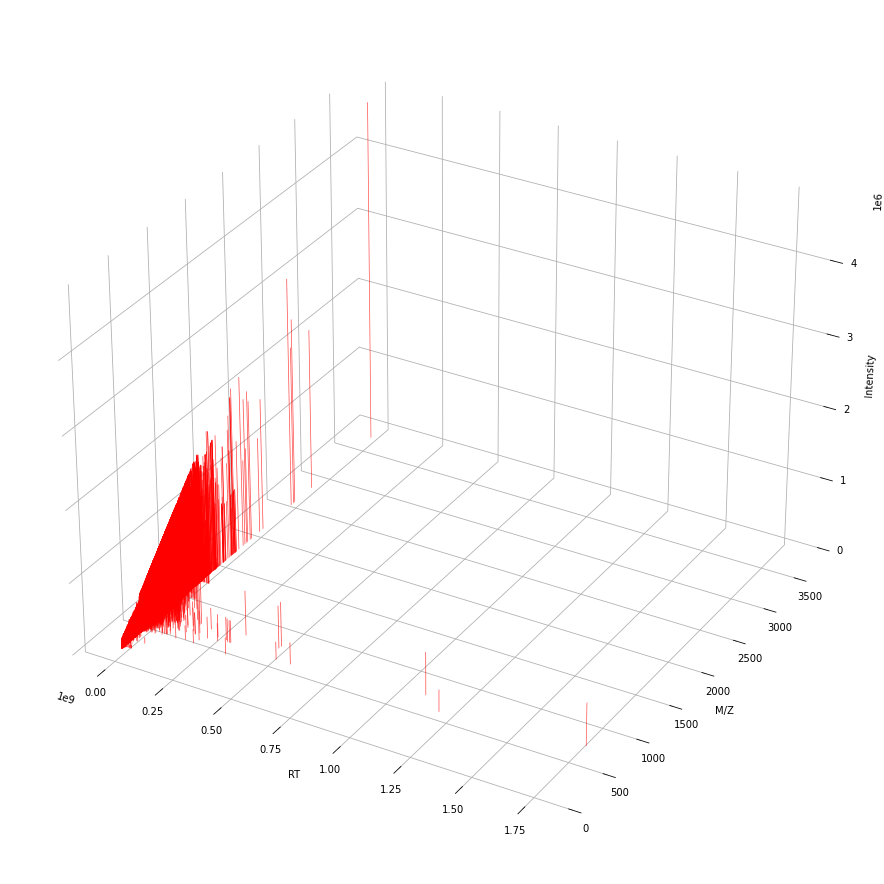

In [48]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')
#for i in range(1):
    #if filtered[i].getMSLevel() == 1:
        #xs = filtered[i].get_peaks()[0]
        #ys = filtered[i].get_peaks()[1]
        #zs = [filtered[i].getRT()]*len(xs)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
for i in range(len(MZs)):   
    ax.bar(MZs[i],RTs[i],INts[i], zdir='x', color=['red'],alpha=0.7,width=10)    
    #ax.plot(RTs[i],MZs[i], INts[i], zdir='z', color='red',alpha=0.8)     
        
ax.set_xlabel("RT")
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

In [43]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 1.0)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
print(max(observed_spectrum.get_peaks()[1]))
# align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

5620661.0


In [44]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())+"\t"+str(theo_spectrum[theo_idx].getIntensity())
      + "\t" + str(observed_spectrum[obs_idx].getMZ())+"\t"+str(observed_spectrum[obs_idx].getIntensity()))

Number of matched peaks: 13
ion	theo. m/z	observed m/z
y7++	2	359.695754280221	1.0	360.0303955078125	20028.359375
b8++	2	366.160690065471	1.0	365.93145751953125	8204.7138671875
y8++	2	395.214311359971	1.0	395.19854736328125	11520.1171875
b9++	2	409.676704645221	1.0	409.92242431640625	3721.725830078125
y4+	1	461.246674487571	1.0	461.2571105957031	7083.2900390625
b10++	2	466.698168740921	1.0	467.1034240722656	17738.55859375
y9++	2	475.22963585257105	1.0	475.23553466796875	24224.21484375
b5+	1	490.171461058071	1.0	490.2240295410156	11353.7958984375
b11++	2	517.222008352571	1.0	516.2407836914062	4594.2900390625
y10++	2	525.7534754642211	1.0	526.2745971679688	144910.828125
b6+	1	561.208575217571	1.0	560.720458984375	2713.0537109375
y12++	2	582.774939559921	1.0	582.8072509765625	2654.836669921875
b9+	1	818.346132823671	1.0	818.2136840820312	3561.39111328125


18 33
19 60
20 181
21 219
22 341
23 356
24 377
25 403
26 435
27 447
31 472
32 490
38 557


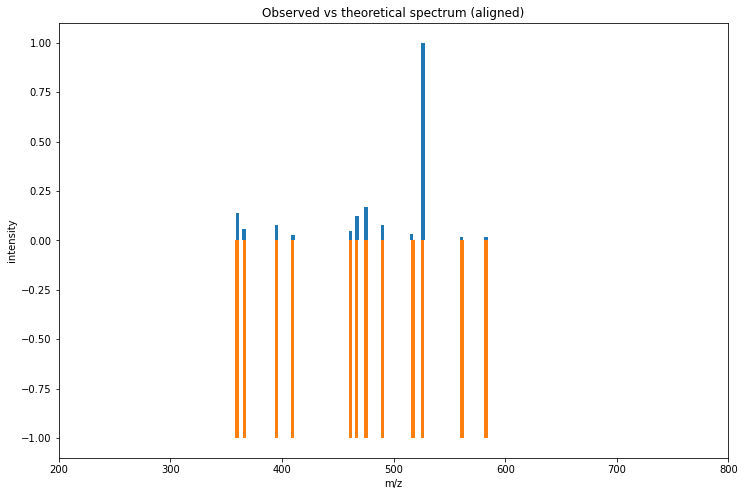

In [45]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())
    print(theo_idx, obs_idx)
title = 'Observed vs theoretical spectrum (aligned)'

for i in range(len(obs_int)):
    if obs_int[i] == 0.0:
        obs_int[i] = -0.001

mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

Text(0.5, 0, 'RT')

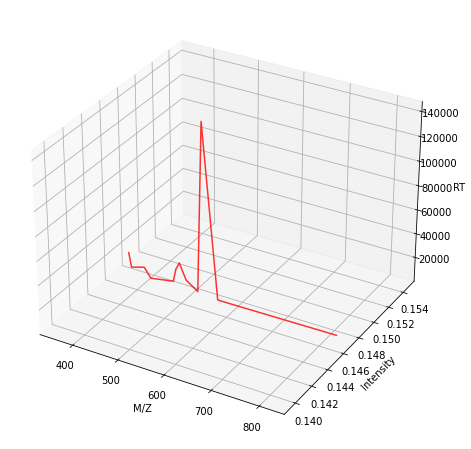

In [46]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
        
z = [rt]*len(obs_mz)
  
ax.plot(obs_mz, obs_int,z, zdir='y', color='red',alpha=0.8) 

ax.set_xlabel('M/Z')
ax.set_ylabel('Intensity')
ax.set_zlabel('RT')